In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import nltk

nltk.download("averaged_perceptron_tagger_eng")
# nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("punkt_tab")
# nltk.download("punkt")
nltk.download("omw-1.4")
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/tylerbreen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tylerbreen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/tylerbreen/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tylerbreen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# // TODO
# Load data from a CSV file named "Tesla - Deaths.csv"
df = pd.read_csv("./Tesla - Deaths.csv", parse_dates=["Date"])

# Display the missing values and  first few rows of the dataframe
print(df.isna().sum())
df.head(3)

Case #                                                                   13
Year                                                                     13
Date                                                                     13
 Country                                                                 13
 State                                                                   13
 Description                                                             12
 Deaths                                                                   8
 Tesla driver                                                            13
 Tesla occupant                                                          17
 Other vehicle                                                           12
 Cyclists/ Peds                                                          11
 TSLA+cycl / peds                                                        10
 Model                                                                   11
 Autopilot c

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,2023-01-17,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,2023-01-07,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN


Perform preliminary data inspection checking for data types, missing values, duplicates.


In [4]:
# Create a Matplotlib figure with a specific size
# plt.figure(figsize=(25, 8))
# // TODO
# Create a heatmap of missing values using Seaborn
fig = px.imshow(df.isna())

# Remove ticks and labels from the left side of the heatmap
# Rotate the x-axis labels by 45 degrees for better readability
fig.update_layout(
    width=800,
    height=800,
    xaxis=dict(tickangle=45),
    yaxis=dict(showticklabels=False),
    coloraxis_colorscale=[[0, "green"], [1, "maroon"]],
)
# Show the heatmap
fig.show()

Remove any columns which might not be relevant for the analysis.


In [5]:
df.isna().sum()

Case #                                                                   13
Year                                                                     13
Date                                                                     13
 Country                                                                 13
 State                                                                   13
 Description                                                             12
 Deaths                                                                   8
 Tesla driver                                                            13
 Tesla occupant                                                          17
 Other vehicle                                                           12
 Cyclists/ Peds                                                          11
 TSLA+cycl / peds                                                        10
 Model                                                                   11
 Autopilot c

In [6]:
df.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 '],
      dtype='object')

## Unnamed: 16 & Unnamed: 17 contain web link which is not useful

## Source : contains web link

## Note : contains additional info

## Deceased 1 2 3 and 4 contain name of the deceased which is irrelevant to the analysis.

## Case # not required

## Year can be derived from date


In [7]:
drop_columns = [
    "Case #",
    "Year",
    "Unnamed: 16",
    "Unnamed: 17",
    " Source ",
    " Note ",
    " Deceased 1 ",
    " Deceased 2 ",
    " Deceased 3 ",
    " Deceased 4 ",
]
df.drop(columns=drop_columns, inplace=True)

In [8]:
df[" Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO "].value_counts(
    dropna=False
)

 Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO 
 -       269
  1       21
NaN       11
  2        3
  3        1
  24       1
  27       1
Name: count, dtype: int64

On closer analysis we find that variable _' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '_ also contain mostly '-' which represent empty or missing hence we remove this column also


In [9]:
df.drop(
    columns=" Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ",
    inplace=True,
)

In [10]:
# Create a DataFrame of boolean values indicating missing values
missing_values = df.isna()

# Create a Matplotlib figure with a specific size
# plt.figure(figsize=(25, 8))
# // TODO
# Create a heatmap of missing values using Seaborn
fig = px.imshow(missing_values)

# Remove ticks and labels from the left side of the heatmap
# Rotate the x-axis labels by 45 degrees for better readability
fig.update_layout(
    width=800,
    height=800,
    xaxis=dict(tickangle=45),
    yaxis=dict(showticklabels=False),
    coloraxis_colorscale=[[0, "green"], [1, "maroon"]],
)
# Show the heatmap
fig.show()

## We still have missing so we will impute

### missing values may be in other forms also like in this data they are in "-"


In [11]:
df.head()

,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths
0,2023-01-17,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-
1,2023-01-07,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-
2,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-
3,2022-12-22,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-
4,2022-12-19,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-


For numerical columns replace "-" with 0 and others with their respective numbers


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               294 non-null    datetime64[ns]
 1    Country                           294 non-null    object        
 2    State                             294 non-null    object        
 3    Description                       295 non-null    object        
 4    Deaths                            299 non-null    float64       
 5    Tesla driver                      294 non-null    object        
 6    Tesla occupant                    290 non-null    object        
 7    Other vehicle                     295 non-null    object        
 8    Cyclists/ Peds                    296 non-null    object        
 9    TSLA+cycl / peds                  297 non-null    object        
 10   Model                             296

In [13]:
df.columns

Index(['Date', ' Country ', ' State ', ' Description ', ' Deaths ',
       ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths '],
      dtype='object')

In [14]:
cols = df.columns[5:]
for col in cols:
    if col != " Model ":
        print(col)
        df[col] = df[col].fillna("-")
        df[col] = df[col].str.strip()
        df[col] = df[col].replace("-", "0")
        df[col] = df[col].astype(int)
        print(df[col].unique())

 Tesla driver 
[   1    0   28   89  117    6 2014]
 Tesla occupant 
[   0    1    3    2    7   41   48    5 2015]
 Other vehicle 
[   0    1    2    3    4   29  101  130   16 2016]
 Cyclists/ Peds 
[   0    1    2   20   26   46   11 2017]
 TSLA+cycl / peds 
[   1    0    2    3    4   61  149  210   21 2018]
 Autopilot claimed 
[   0    1    2    8   30   38   47 2020]
 Verified Tesla Autopilot Deaths 
[   0    1    2    3   16   19  118 2022   75 2021]


In [15]:
df.isna().sum()

Date                                 13
 Country                             13
 State                               13
 Description                         12
 Deaths                               8
 Tesla driver                         0
 Tesla occupant                       0
 Other vehicle                        0
 Cyclists/ Peds                       0
 TSLA+cycl / peds                     0
 Model                               11
 Autopilot claimed                    0
 Verified Tesla Autopilot Deaths      0
dtype: int64

In [16]:
df.dropna(inplace=True)

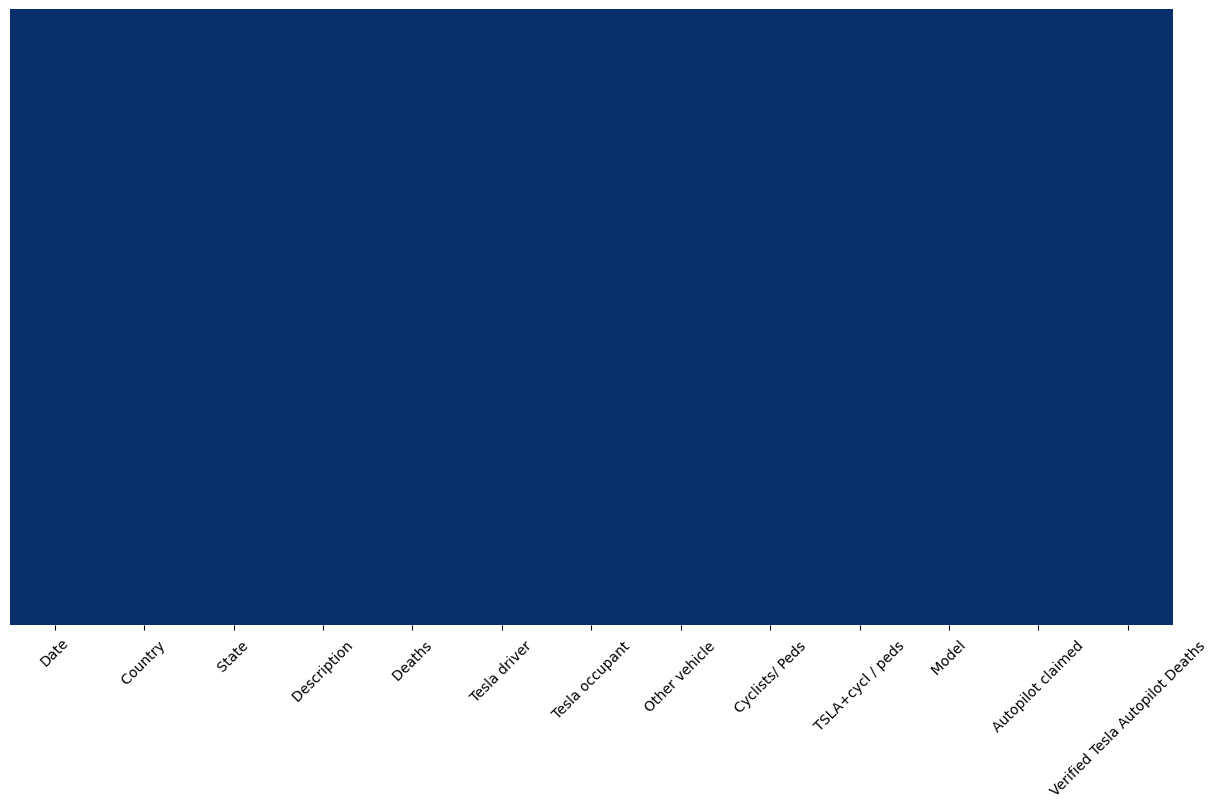

In [18]:
missing_values = df.isna()
plt.figure(figsize=(15, 8))
sns.heatmap(missing_values, cmap="Blues_r", cbar=False)
plt.tick_params(left=False, labelleft=False)
plt.xticks(rotation=45)
plt.show()

# Change the variable names in accordance to the python norms


In [19]:
df.columns = df.columns.str.strip()
df.columns

Index(['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla driver',
       'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds',
       'Model', 'Autopilot claimed', 'Verified Tesla Autopilot Deaths'],
      dtype='object')

In [20]:
df.columns = df.columns.str.replace(" ", "", regex=True).str.replace(
    "[+/]", "_", regex=True
)

In [21]:
df.columns

Index(['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesladriver',
       'Teslaoccupant', 'Othervehicle', 'Cyclists_Peds', 'TSLA_cycl_peds',
       'Model', 'Autopilotclaimed', 'VerifiedTeslaAutopilotDeaths'],
      dtype='object')

In [22]:
df.rename(
    columns={
        "Autopilotclaimed": "Claimed",
        "VerifiedTeslaAutopilotDeaths": "VTAD",
        "Teslaoccupant": "Tesla_Occupant",
        "Othervehicle": "Other_Vehicle",
        "Tesladriver": "Tesla_Driver",
    },
    inplace=True,
)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            294 non-null    datetime64[ns]
 1   Country         294 non-null    object        
 2   State           294 non-null    object        
 3   Description     294 non-null    object        
 4   Deaths          294 non-null    float64       
 5   Tesla_Driver    294 non-null    int64         
 6   Tesla_Occupant  294 non-null    int64         
 7   Other_Vehicle   294 non-null    int64         
 8   Cyclists_Peds   294 non-null    int64         
 9   TSLA_cycl_peds  294 non-null    int64         
 10  Model           294 non-null    object        
 11  Claimed         294 non-null    int64         
 12  VTAD            294 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 32.2+ KB


# Exploratory Data Analysis


## Perform an in depth exploratory data analysis. Analysing the number of events by date, per year , per day for each state and country.

- Split the date into year month and day


In [24]:
df.Date = pd.to_datetime(df.Date)

In [25]:
df.loc[:, "event_year"] = df.Date.dt.year
df.loc[:, "event_month"] = df.Date.dt.month
df.loc[:, "event_day"] = df.Date.dt.day

## Year wise info


### remove year 2023 as too little info available


In [26]:
# Filter the 'df' DataFrame to exclude rows where the 'event_year' column is equal to 2023
# // TODO
df.drop(df[df["event_year"] == 2023].index, inplace=True)
df.reset_index(inplace=True)

In [27]:
vc = df.event_year.value_counts()
vc = vc.sort_index()
vc = vc.to_dict()
vc

{2013: 2,
 2014: 4,
 2015: 5,
 2016: 15,
 2017: 11,
 2018: 18,
 2019: 46,
 2020: 39,
 2021: 58,
 2022: 93}

In [28]:
# Data found at this wedsite:
# https://www.investing.com/academy/statistics/tesla-facts/#how-many-tesla-vehicles-are-sold-each-year
teslas_sold_per_year = pd.DataFrame(
    {
        "Year": [
            2013,
            2014,
            2015,
            2016,
            2017,
            2018,
            2019,
            2020,
            2021,
            2022,
        ],
        "Cars Sold": [
            22442,
            31655,
            50792,
            75890,
            103014,
            245491,
            367656,
            499647,
            936222,
            1313851,
        ],
    }
)


teslas_sold_per_year["Events Per Year"] = teslas_sold_per_year["Year"].map(vc)
teslas_sold_per_year["Cars currently on road"] = np.zeros(10)
total = 0
for i, sold in enumerate(teslas_sold_per_year["Cars Sold"]):
    total += sold
    teslas_sold_per_year.loc[i, "Cars currently on road"] = total

teslas_sold_per_year["Cars currently on road actual"] = teslas_sold_per_year[
    "Cars currently on road"
]

divider = 30000
teslas_sold_per_year["Cars currently on road"] = round(
    teslas_sold_per_year["Cars currently on road"] / divider
)
teslas_sold_per_year["Cars currently on road"].astype(int)

# Create a Matplotlib figure with a specific size
# // TODO
# Create a bar chart
# Set the chart title and customize its appearance
fig = px.bar(
    teslas_sold_per_year,
    x="Year",
    y=["Events Per Year", "Cars currently on road"],
    title="Events Per Year / Tesla on the road",
)

# Annotate the bars with their respective values
fig.update_traces(
    text=teslas_sold_per_year["Events Per Year"].astype(str),
    selector=dict(name="Events Per Year"),
)

fig.update_traces(
    text=teslas_sold_per_year["Cars currently on road actual"].astype(int),
    selector=dict(name="Cars currently on road"),
)

# Set the x-axis ticks and labels to be the values from 'vc.index'
# Set the y-axis limit to control the range of the y-axis
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Count",
    yaxis=dict(range=[0, 130], showticklabels=False),
    xaxis=dict(
        tickmode="array",
        tickvals=teslas_sold_per_year["Year"],
    ),
    barmode="group",
)

# Show the bar chart
# // TODO
fig.show()

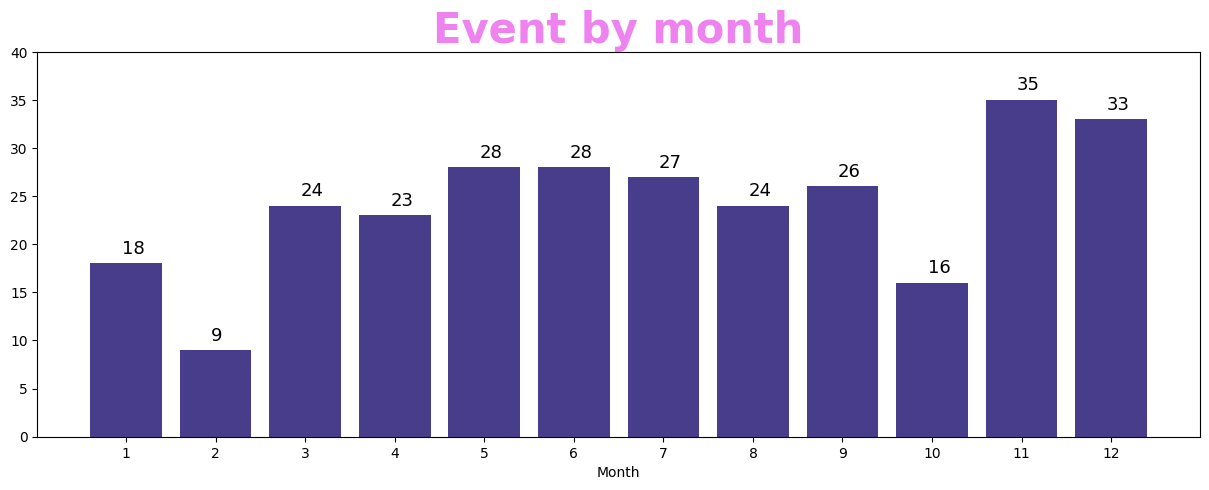

In [29]:
vc = df.event_month.value_counts()
vc = vc.sort_index()
plt.figure(figsize=(15, 5))
plt.bar(height=vc.values, x=vc.index, color="darkslateblue")
plt.xticks(vc.index, vc.index)
for i in vc.index:
    plt.annotate(vc[i], xy=(i - 0.05, vc[i] + 1), size=13)
plt.ylim(0, 5 * round(vc.max() / 5) + 5)
plt.xlabel("Month")
plt.title("Event by month", size=30, color="violet", weight="heavy")
plt.show()

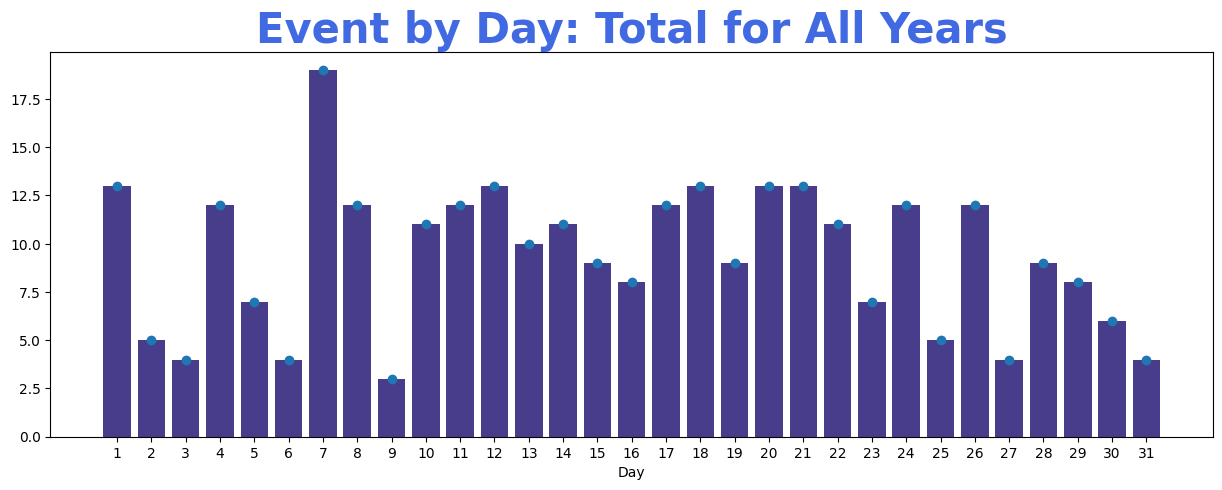

In [30]:
# TODO
# Calculate the counts of events for each day and store them in 'vc'
# Sort 'vc' by index (in this case, the days)
vc = df["event_day"].value_counts().sort_index()

# Create a Matplotlib figure with a specific size
plt.figure(figsize=(15, 5))

# Create a line plot
plt.bar(height=vc.values, x=vc.index, color="darkslateblue")

plt.xticks(vc.index, vc.index)

# Add scatter points to the line plot for each data point
plt.scatter(vc.index, vc.values)

# Set the x-axis label
plt.xlabel("Day")

# Set the chart title and customize its appearance
plt.title(
    "Event by Day: Total for All Years", size=30, color="royalblue", weight="heavy"
)

# Show the line plot with scatter points
plt.show()

# Conclusion :

- Tesla's accident volume tends to increase every year
- The number of accidents in November and December is the highest.
- Day wise no concrete info as the distribution pattern is irregular

## However for year wise pattern we should be considering the accidents vs sales data. More Tesla on road will definetly bring a rise in no. of accidents while proportion of accidents might not increase as such.


/var/folders/gd/vdbwszg509v0q5jvf1wsnrdh0000gn/T/ipykernel_98148/1302801984.py:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



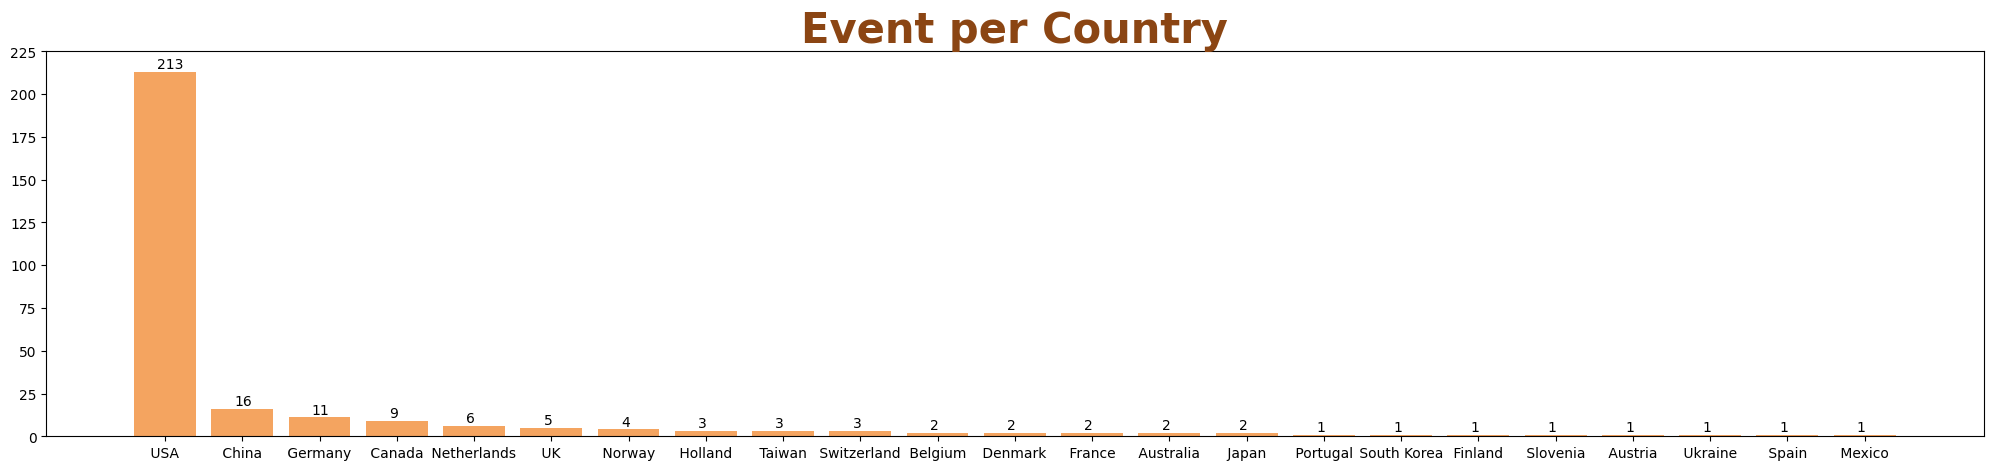

In [31]:
# Calculate the counts of events for each country and store them in 'vc'
vc = df.Country.value_counts()
# TODO
# Create a Matplotlib figure with a specific size
plt.figure(figsize=(25, 5))

# Create a bar chart
plt.bar(height=vc.values, x=vc.index, color="sandybrown")

# Set the x-axis ticks and labels to be the values from 'vc.index'
plt.xticks(vc.index, vc.index)

# Annotate the bars with their respective values
for i in range(len(vc.index)):
    plt.annotate(vc[i], xy=(i - 0.1, vc[i] + 2), size=10)

# Set the chart title and customize its appearance
plt.title("Event per Country", size=30, color="saddlebrown", weight="heavy")

# Set the y-axis limit based on the maximum count of events
plt.ylim(0, 25 * round(vc.max() / 25))

# Show the bar chart
plt.show()

In [32]:
df.State = df.State.str.strip()

/var/folders/gd/vdbwszg509v0q5jvf1wsnrdh0000gn/T/ipykernel_98148/739931013.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



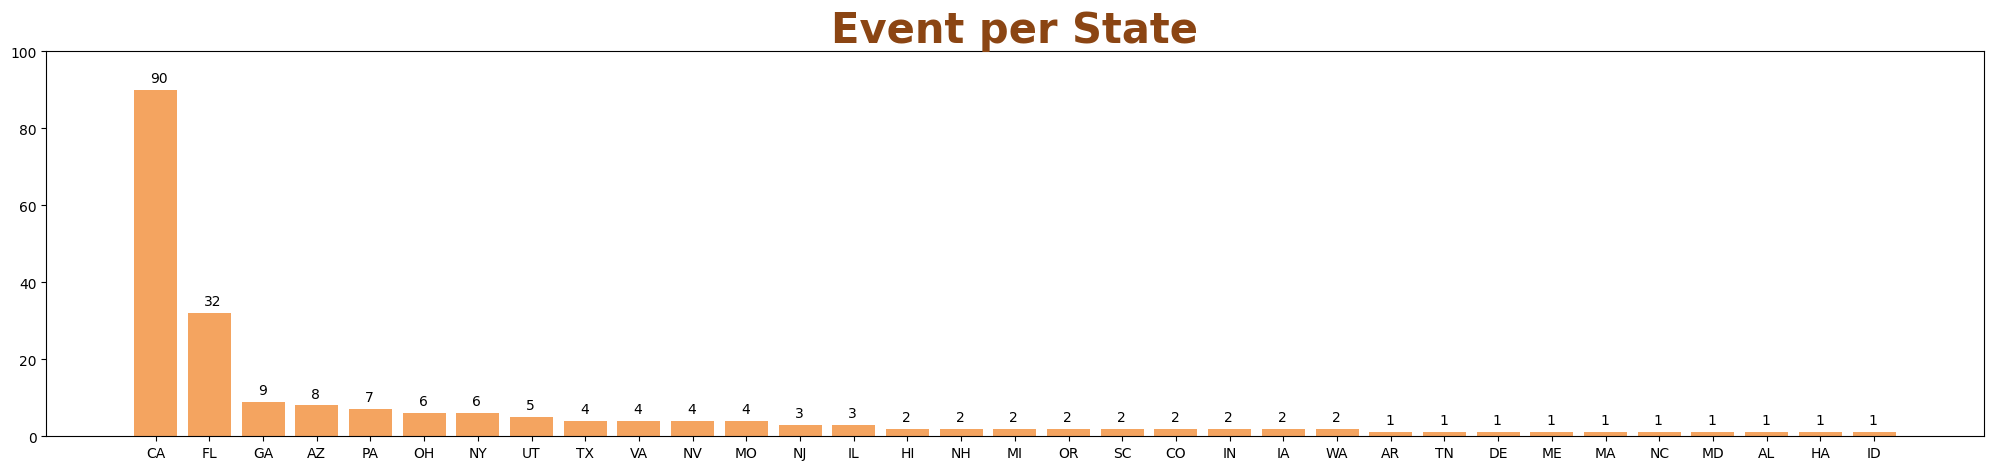

In [33]:
vc = df.State.value_counts()
vc = vc[vc.index != "-"]
plt.figure(figsize=(25, 5))
plt.bar(height=vc.values, x=vc.index, color="sandybrown")
plt.xticks(vc.index, vc.index)
for i in range(len(vc.index)):
    plt.annotate(vc[i], xy=(i - 0.1, vc[i] + 2), size=10)
plt.title("Event per State", size=30, color="saddlebrown", weight="heavy")
plt.ylim(0, 25 * round(vc.max() / 25))
plt.show()

## Analyse the different aspects of the death events. For example

> 1. Compare the number of victims(deaths) in each accident.
> 2. In how many events the tesla driver died.
> 3. What is the proportion of events in which 1 or more occupants died ?
> 4. What is the distribution of events in which the vehicle hit a cyclist or a pedestrian ?
> 5. How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian ?
> 6. What is the percentage of times tesla hit some other vehicle


In [34]:
df.columns

Index(['index', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla_Driver', 'Tesla_Occupant', 'Other_Vehicle', 'Cyclists_Peds',
       'TSLA_cycl_peds', 'Model', 'Claimed', 'VTAD', 'event_year',
       'event_month', 'event_day'],
      dtype='object')

In [35]:
col_list = [
    "Deaths",
    "Tesla_Driver",
    "Tesla_Occupant",
    "Other_Vehicle",
    "Cyclists_Peds",
    "TSLA_cycl_peds",
]

In [36]:
colr = [
    "salmon",
    "mediumaquamarine",
    "mediumpurple",
    "goldenrod",
    "silver",
    "saddlebrown",
]

In [37]:
# Create a 2x3 grid of subplots with a specific figure size
# f, ax = plt.subplots(2, 3, figsize=(25, 10))
fig = make_subplots(
    rows=2,
    cols=3,
    subplot_titles=[col.replace("_", " ") for col in col_list],
)

# Initialize variables i, j, and k for indexing and color selection
i, j, k = 0, 0, 0

# Iterate through the list of column names in 'col_list'
for col in col_list:
    # Calculate value counts for the current column 'col'
    vc = df[col].value_counts()
    vc = vc.sort_index()

    # Calculate the percentage distribution of values
    perc = (vc / vc.sum() * 100).round(1)

    # // TODO
    # Create a bar chart in the current subplot (i, j)
    # Set the title for the subplot, replacing underscores with spaces
    # Annotate the bars with percentage values
    fig.add_trace(
        go.Bar(
            x=vc.index,
            y=vc.values,
            text=perc,
            name=col.replace("_", " "),
        ),
        row=i + 1,
        col=j + 1,
    )

    # Set x-axis ticks to match the unique values in the column
    fig.update_xaxes(
        tickvals=vc.index,
        ticktext=vc.index,
        row=i + 1,
        col=j + 1,
    )

    # Set the y-axis limit based on the maximum count of values
    fig.update_yaxes(
        range=[0, vc.max() * 1.2],
        row=i,
        col=j,
    )

    # Update indexing variables
    j += 1

    # If j reaches 3 (end of a row), reset j and increment i
    if j >= 3:
        j = 0
        i += 1

fig.show()

## Study the event distribution across models.


In [38]:
df.Model = df.Model.str.strip()
df.Model = df.Model.replace("-", "0")

# since currently we have only 4 existing models S, X Y and 3 we will analyse them


In [62]:
# Calculate the counts of events for each car model and select specific models
vc = df.Model.value_counts()
vc = vc[["S", "X", "Y", "3"]]
print(f"vc: {vc}")

# Create a Matplotlib figure with a specific figure size
# plt.figure(figsize=(15, 5))

# TODO
fig = go.Figure()

# Create a bar chart
# Annotate the bars with their respective values
fig.add_trace(
    go.Bar(
        x=vc.index,
        y=vc.values,
        text=vc.values,
    ),
)

# Set x-axis labels to include "Model -" before the model name
fig.update_xaxes(
    tickvals=vc.index,
    ticktext=[f"Model - {x}" for x in vc.index],
)

# Set the chart title and customize its appearance
fig.update_layout(title_text="Model Distribution", title_font_size=20)

# Set the y-axis limit based on the maximum count of events
fig.update_yaxes(range=[0, vc.max()])

# Show the bar chart
fig.show()

vc: Model
S    45
X    17
Y    10
3    39
Name: count, dtype: int64


# Check the distribution of Verified Tesla autopilot deaths.


In [40]:
# // TODO
vc = df["VTAD"].value_counts()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=vc.index,
        y=vc.values,
        text=vc.values,
    ),
)

fig.update_xaxes(
    tickvals=vc.index,
    ticktext=vc.index,
)

fig.update_layout(
    title_text="Distribution of Verified Tesla Autopilot Deaths", title_font_size=20
)

fig.show()

## Creating Clusters for further analysis

### Hint : Use the Description of the event to cluster together similar events.

#### 1. The description data is in text format hence you need to use Natural language processing here.

> **a. Perform lemmatization i.e conversion of words to their root word. Lemmatization function is available in “nltk package “**

> **b. Perform Feature extraction using TfidfVectorizer function in sklearn package ( sklearn.feature_extraction.text.TfidfVectorizer) of python. TFidf means Term Frequency - Inverse Document Frequency.**

> **c.This is done to convert the text data to numeric form so that a ML model can be implemented on the data.**

#### 2. Use a KMeans algorithm to cluster similar events based on their description.


In [41]:
# Get wordenet POS tag for words
# // TODO
def get_wordnet_pos(word):
    tag = nltk.tag.pos_tag([word])[0][1]

    if tag[0] == "V":
        return wordnet.VERB
    elif tag[0] == "J":
        return wordnet.ADJ
    elif tag[0] == "R":
        return wordnet.ADV
    elif tag[0] == "N":
        return wordnet.NOUN
    else:
        return wordnet.NOUN

In [42]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(text)]

In [43]:
descr = df.Description

In [44]:
lemma = [lemmatize_text(text) for text in descr]

In [45]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform([" ".join(text) for text in lemma])

In [46]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
print("Total Features:", len(vectorizer.get_feature_names_out()))

Total Features: 245


## Clustering using K Means


In [48]:
# // TODO
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
clusters = pd.DataFrame(kmeans.labels_, columns=["Cluster"])
clusters

,Cluster
0,1
1,1
2,2
3,2
4,1
...,...
286,2
287,1
288,3
289,2


In [49]:
df.Description.value_counts()

Description
Tesla kills pedestrian                         10
Tesla kills motorcyclist                        6
Tesla into oncoming traffic                     5
Tesla rear ends stopped car                     4
Tesla drives off cliff                          4
                                               ..
Tesla loses control and drives into river       1
Crash in public area including 20 injuries      1
Vehicular collision                             1
Tesla crashes into trees, flames erupt          1
Tesla veers into opposite lane                  1
Name: count, Length: 245, dtype: int64

#### creating a df using descr and clusters.

#### making sure clusters has same index as descr


## merging clusters to actual data using index as primary key

## as description is not unique


In [50]:
# // TODO
# Concatenate 'df' DataFrame and 'clusters' Series into a new DataFrame 'df'
df = pd.concat([df, clusters], axis=1)

# Count the occurrences of values in the "Description" column of 'df'
df["Description"].value_counts()

Description
Tesla kills pedestrian                         10
Tesla kills motorcyclist                        6
Tesla into oncoming traffic                     5
Tesla rear ends stopped car                     4
Tesla drives off cliff                          4
                                               ..
Tesla loses control and drives into river       1
Crash in public area including 20 injuries      1
Vehicular collision                             1
Tesla crashes into trees, flames erupt          1
Tesla veers into opposite lane                  1
Name: count, Length: 245, dtype: int64

## Analysing the Clusters :

> Use these different clusters to study the distribution of different types of accidents.


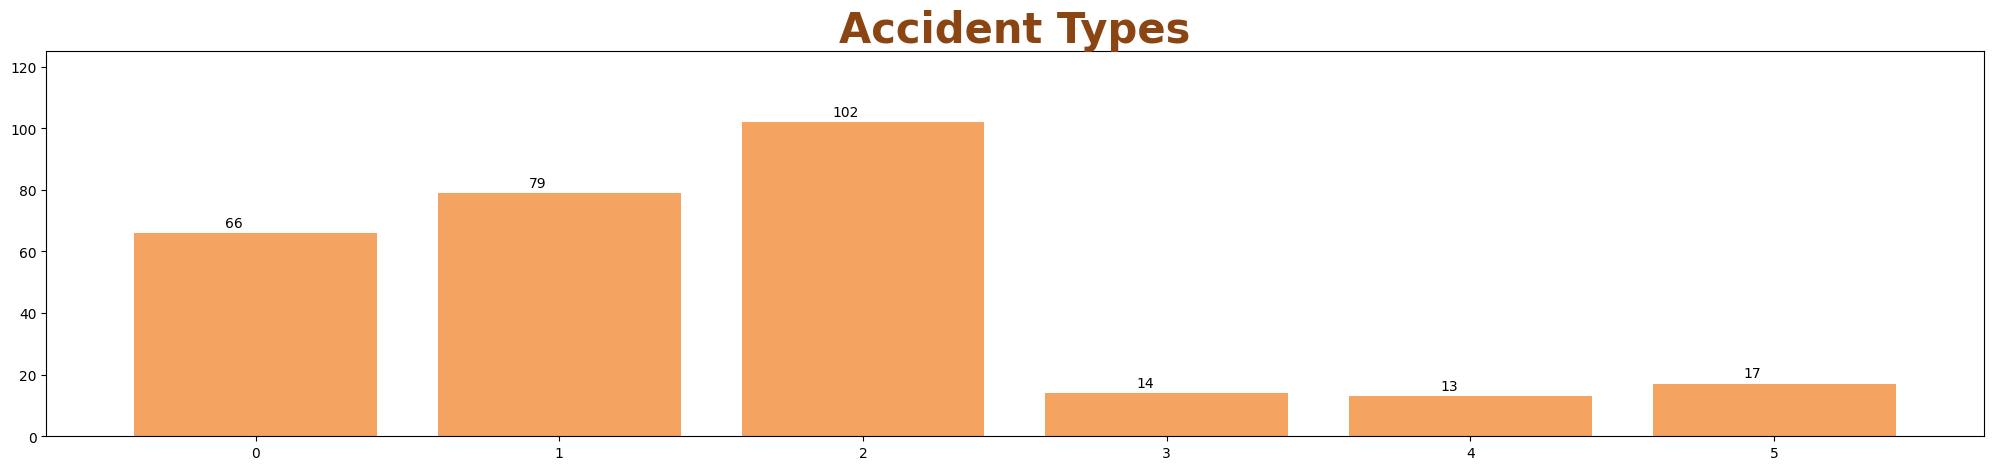

In [51]:
vc = df.Cluster.value_counts().sort_index()
plt.figure(figsize=(25, 5))
plt.bar(height=vc.values, x=vc.index, color="sandybrown")
plt.xticks(vc.index, vc.index)
for i in range(len(vc.index)):
    plt.annotate(vc[i], xy=(i - 0.1, vc[i] + 2), size=10)
plt.title("Accident Types", size=30, color="saddlebrown", weight="heavy")
plt.ylim(0, 25 * round(vc.max() / 25) + 25)
plt.show()

> Study the most common accident description in each accident type (clusters)


In [52]:
def mode_descr(x):
    return x.mode()[0]


def freq_count(x):
    return x.value_counts()[0]

In [60]:
df.groupby("Cluster").agg({"Description": [mode_descr, freq_count]})

/var/folders/gd/vdbwszg509v0q5jvf1wsnrdh0000gn/T/ipykernel_98148/4159297444.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/gd/vdbwszg509v0q5jvf1wsnrdh0000gn/T/ipykernel_98148/4159297444.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/gd/vdbwszg509v0q5jvf1wsnrdh0000gn/T/ipykernel_98148/4159297444.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/gd/vdbwszg509v0q5jvf1wsnrdh0000gn/T/ipy

Description           
                                                mode_descr freq_count
Cluster                                                              
0                             Tesla into oncoming traffic           5
1                                 Tesla crashes into tree           3
2                                  Tesla kills pedestrian          10
3                             Tesla rear ends stopped car           4
4                                  Tesla drives off cliff           4
5         Driver runs over curb, loses control and hit ...          1

In [53]:
# // TODO
# Iterate over unique values in the "Cluster" column of 'df'
for i in df["Cluster"].sort_values().unique():

    # Filter the DataFrame to select rows with the current cluster
    cluster_df = df[df["Cluster"] == i]

    # Print a header for the current cluster
    print(f"Accident Type: {i}")

    # Print the top 3 most common descriptions and their counts
    vc = cluster_df["Description"].value_counts()
    print(vc.sort_values(ascending=False)[0:3])

    # Print a separator line
    print("\n", "_" * 70, "\n\n")

Accident Type: 0
Description
Tesla rear ends stopped car     4
Three car collision             3
Multi-car accident              2
Name: count, dtype: int64

 ______________________________________________________________________ 


Accident Type: 1
Description
Five-vehicle pileup involving truck     1
Driver died in pileup                   1
Pileup                                  1
Name: count, dtype: int64

 ______________________________________________________________________ 


Accident Type: 2
Description
Collision at intersection                                    1
Collision at intersection, Tesla driver dies in hospital     1
Head-on collision                                            1
Name: count, dtype: int64

 ______________________________________________________________________ 


Accident Type: 3
Description
Tesla kills pedestrian          10
Tesla kills motorcyclist         6
Tesla into oncoming traffic      5
Name: count, dtype: int64

 ____________________________

> Study accident type vs Death count.


In [54]:
df.columns

Index(['index', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla_Driver', 'Tesla_Occupant', 'Other_Vehicle', 'Cyclists_Peds',
       'TSLA_cycl_peds', 'Model', 'Claimed', 'VTAD', 'event_year',
       'event_month', 'event_day', 'Cluster'],
      dtype='object')

In [55]:
# Create a contingency table between "Cluster" and "Deaths" and reset the index
# // TODO

vc = pd.crosstab(df["Cluster"], df["Deaths"])
vc.reset_index(inplace=True)

# Melt the DataFrame into a long format, specifying "Cluster" as the id variable and "Deaths" as the value variable

# @ I adjusted the original a little bit to make it work.
vc.melt(id_vars="Cluster", var_name="Deaths", value_name="Count")
# vc.melt(id_vars="Cluster", value_vars="Deaths")

,Cluster,Deaths,Count
0,0,1.0,31
1,1,1.0,4
2,2,1.0,25
3,3,1.0,99
4,4,1.0,43
5,5,1.0,42
6,0,2.0,9
7,1,2.0,0
8,2,2.0,1
9,3,2.0,9


In [56]:
cluster_death = df.groupby(["Cluster", "Deaths"]).size().reset_index()
cluster_death.columns = ["Cluster", "Deaths", "Count"]
cluster_death

,Cluster,Deaths,Count
0,0,1.0,31
1,0,2.0,9
2,0,3.0,3
3,0,4.0,1
4,1,1.0,4
5,2,1.0,25
6,2,2.0,1
7,3,1.0,99
8,3,2.0,9
9,3,3.0,2


In [57]:
# Create a Matplotlib figure with a specific figure size
# plt.figure(figsize=(20, 6))
fig = go.Figure()

# Iterate over unique cluster values in sorted order
for clus in sorted(df.Cluster.unique()):

    # // TODO
    # Filter the DataFrame to select rows with the current cluster
    cluster_df = cluster_death[cluster_death["Cluster"] == clus]

    # Create a line plot for the current cluster
    # Add scatter points to the line plot for each data point
    # Add a legend to the plot
    fig.add_trace(
        go.Scatter(
            x=cluster_df["Deaths"],
            y=cluster_df["Count"],
            name=f"Cluster {clus}",
        )
    )


# Set the chart title
fig.update_layout(title="Deaths for different Accident Types")

# Show the line plot
fig.show()

> Study the accident type across months to understand the most common accident type in the months with highest accident count.


In [58]:
colr = [
    "darkorange",
    "mediumaquamarine",
    "mediumpurple",
    "goldenrod",
    "silver",
    "saddlebrown",
]

In [59]:
fig = go.Figure()

# Iterate over unique cluster values in sorted order
for clus in sorted(df.Cluster.unique()):

    # // TODO
    # Filter the DataFrame to select rows with the current cluster
    cluster_df = df[df["Cluster"] == clus]
    numOfDeathsPerMonth_df = cluster_df.groupby("event_month")["Deaths"].sum()

    # Create a line plot for the current cluster
    # Add scatter points to the line plot for each data point
    # Add a legend for the current cluster
    fig.add_trace(
        go.Scatter(
            x=numOfDeathsPerMonth_df.index,
            y=numOfDeathsPerMonth_df.values,
            name=f"Cluster {clus}",
        )
    )


fig.update_layout(title="Deaths for every Month")

fig.show()

In [60]:
colr = ["steelblue", "darkorange", "limegreen", "indianred", "mediumpurple"]

In [61]:
import calendar

In [62]:
# Create a Matplotlib figure with a specific figure size
# plt.figure(figsize=(20, 6))
fig = go.Figure()

# // TODO

# Initialize variable 'i' for color selection
# Iterate over unique cluster values in sorted order
for clus in sorted(df.Cluster.unique()):

    # Filter the DataFrame to select rows with the current cluster
    cluster_df = df[df["Cluster"] == clus]
    numOfDeathsPerMonth_df = cluster_df.groupby("event_month")["Deaths"].sum()

    # Create a line plot for the current cluster with a specific color
    # Add scatter points to the line plot for each data point with the same color
    # Annotate the data points with their respective values using the same color
    # Add a legend to the plot
    # // TODO
    fig.add_trace(
        go.Scatter(
            name=f"Cluster {clus}",
            x=numOfDeathsPerMonth_df.index,
            y=numOfDeathsPerMonth_df.values,
            text=numOfDeathsPerMonth_df.values,
            mode="lines+markers+text",
            textposition="top center",
        )
    )
    # Increment the color index 'i' for the next cluster
    # @ I used a for() loop... :)

# Set x-axis ticks and labels to display month names
fig.update_xaxes(
    tickvals=[x for x in range(1, 13)],
    ticktext=calendar.month_name[1:13],
)

# Set the chart title
fig.update_layout(title="Accident Types Across Different Months", title_font_size=30)

# Show the line plot
# // TODO
fig.show()